                                                   FACE REGONITION(CNN)(G vijay ragavan G)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMG_SIZE=224
BATCH_SIZE=32

In [ ]:
train_datagen= ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [ ]:
train_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/pic data1/team data/train',
   target_size=(IMG_SIZE,IMG_SIZE),
   batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 22 images belonging to 3 classes.


In [ ]:
val_generator=train_datagen.flow_from_directory(
    '/content/drive/MyDrive/pic data1/team data/train',
   target_size=(IMG_SIZE,IMG_SIZE),
   batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 5 images belonging to 3 classes.


In [ ]:
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())
print("class indices:",class_indices)
print("class names:",class_names)

class indices: {'deepika': 0, 'nagalingeshwaran': 1, 'vijay': 2}
class names: ['deepika', 'nagalingeshwaran', 'vijay']


In [ ]:
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(3,activation='softmax')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_generator,epochs=25,validation_data=val_generator,batch_size=BATCH_SIZE)

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6364 - loss: 0.9234 - val_accuracy: 0.4000 - val_loss: 1.0251
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5455 - loss: 0.8466 - val_accuracy: 0.2000 - val_loss: 1.0465
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5909 - loss: 0.8161 - val_accuracy: 0.4000 - val_loss: 1.2711
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5909 - loss: 0.8200 - val_accuracy: 0.4000 - val_loss: 0.9675
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5455 - loss: 0.8837 - val_accuracy: 0.2000 - val_loss: 1.2795
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.8636 - loss: 0.6537 - val_accuracy: 0.2000 - val_loss: 1.3045
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.7727 - loss: 0.6256 - val_accuracy: 0.0000e+00 - val_loss: 1.1870
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.7727 - loss: 0.6644 - val_accuracy: 0.4000 - val_loss: 1.1648
Epoch 9/25
1

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/FACEREGNITION.h5')

In [5]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model('/content/drive/MyDrive/Colab Notebooks/FACEREGNITION.h5')
print("Model Loaded")

Model Loaded


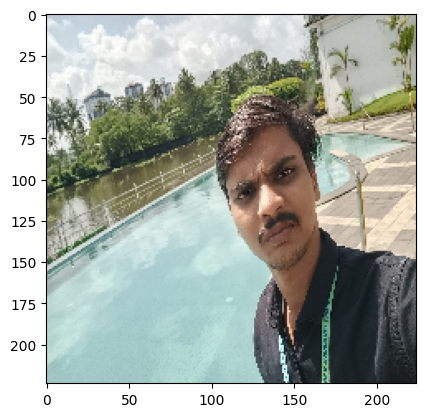

In [7]:
test_image_path="/content/Vj.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [8]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=img_array/255.0

In [12]:
prediction=model.predict(img_array)
ind=np.argmax(prediction[0])
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
vijay
